In [54]:
import pandas as pd

In [4]:
df = pd.read_csv("loan-recovery.csv")

In [5]:
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [6]:
df.columns

Index(['Borrower_ID', 'Age', 'Gender', 'Employment_Type', 'Monthly_Income',
       'Num_Dependents', 'Loan_ID', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Loan_Type', 'Collateral_Value',
       'Outstanding_Loan_Amount', 'Monthly_EMI', 'Payment_History',
       'Num_Missed_Payments', 'Days_Past_Due', 'Recovery_Status',
       'Collection_Attempts', 'Collection_Method', 'Legal_Action_Taken'],
      dtype='object')

In [7]:
df.shape

(500, 21)

In [8]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

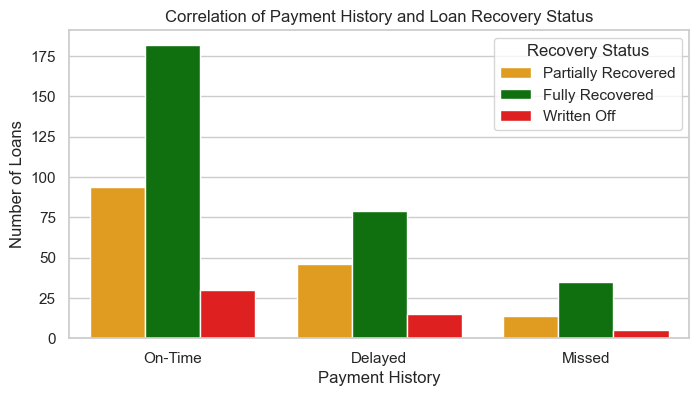

In [16]:
palette = {
    "Fully Recovered": "green",
    "Partially Recovered": "orange",
    "Written Off": "red"
}

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Payment_History", hue="Recovery_Status", palette=palette)
plt.title("Correlation of Payment History and Loan Recovery Status")
plt.xlabel("Payment History")
plt.ylabel("Number of Loans")
plt.legend(title="Recovery Status")
plt.show()

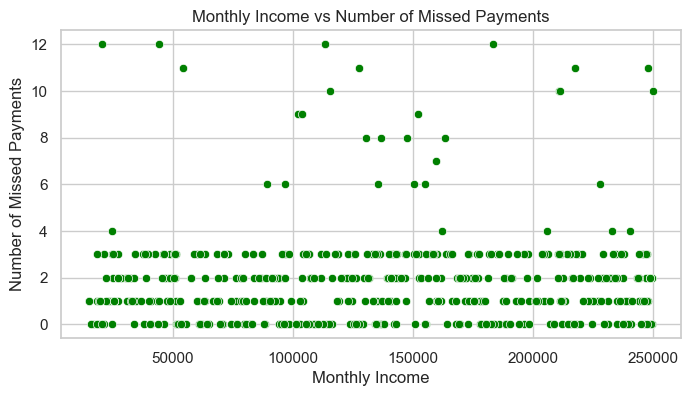

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="Monthly_Income", y="Num_Missed_Payments", color = "green")
plt.title("Monthly Income vs Number of Missed Payments")
plt.xlabel("Monthly Income")
plt.ylabel("Number of Missed Payments")
plt.show()

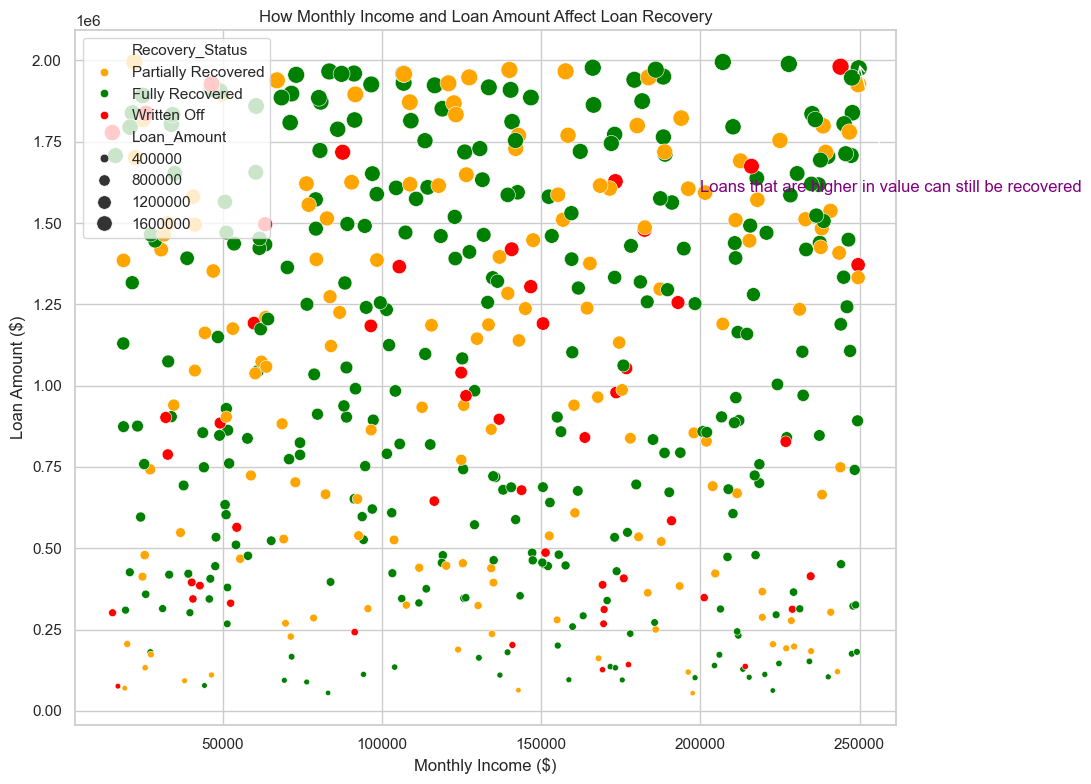

In [28]:
plt.figure(figsize=(11, 8))

palette = {
    "Partially Recovered": "orange",
    "Fully Recovered": "green",
    "Written Off": "red"
}

sns.scatterplot(
    data=df,
    x="Monthly_Income",
    y="Loan_Amount",
    hue="Recovery_Status",
    size="Loan_Amount",  
    sizes=(15, 150),      
    palette=palette,
)

plt.title("How Monthly Income and Loan Amount Affect Loan Recovery")
plt.xlabel("Monthly Income ($)")
plt.ylabel("Loan Amount ($)")

max_income = df["Monthly_Income"].max()
max_loan = df["Loan_Amount"].max()
plt.annotate(
    "Loans that are higher in value can still be recovered",
    xy=(max_income, max_loan),
    xytext=(max_income * 0.8, max_loan * 0.8),
    arrowprops=dict(facecolor='blue', arrowstyle="->"),
    fontsize=12,
    color="purple"
)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
features_list = ['Age', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate', 'Monthly_Income', 'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

In [31]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features_list])

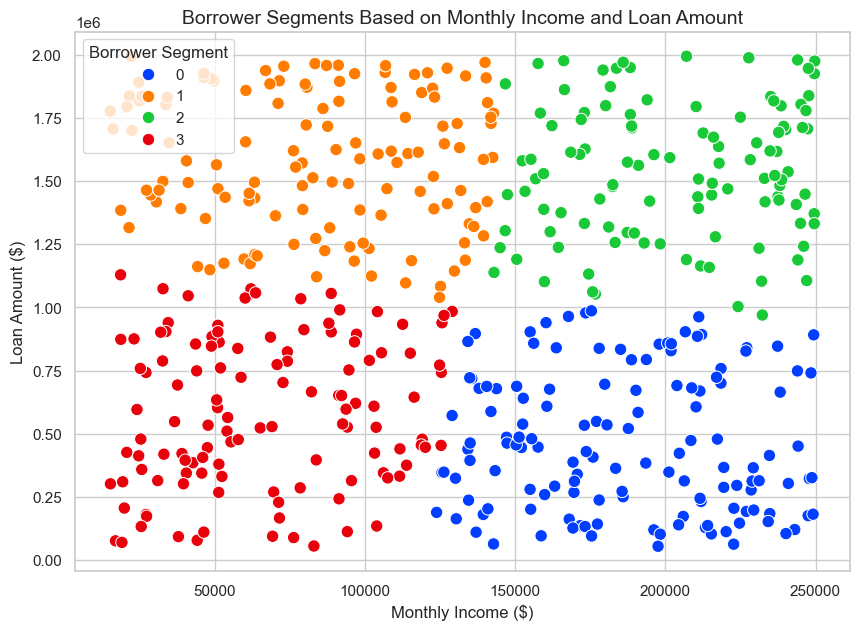

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Monthly_Income', 'Loan_Amount']])

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Borrower_Segment'] = kmeans.fit_predict(df_scaled)


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Monthly_Income', y='Loan_Amount',
                hue='Borrower_Segment', palette='bright', s=80)

plt.title("Borrower Segments Based on Monthly Income and Loan Amount", fontsize=14)
plt.xlabel("Monthly Income ($)")
plt.ylabel("Loan Amount ($)")
plt.legend(title='Borrower Segment')
plt.grid(True)
plt.show()

In [33]:
df['Segment_Name'] = df['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

In [38]:
df['High_Risk'] = df['Segment_Name'].isin([ 'High Loan, Higher Default Risk',  'Moderate Income, High Loan Burden']).astype(int)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [44]:
features_list = ['Age', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate', 'Monthly_Income', 'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features_list]
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

risk_scores = rf_model.predict_proba(X_test)[:, 1] 

df_test_copy = X_test.copy()
df_test_copy['Risk_Score'] = risk_scores
df_test_copy['Predicted_High_Risk'] = (df_test_copy['Risk_Score'] > 0.6).astype(int)  

df_test_copy = df_test_copy.merge(df[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
left_index=True, right_index=True)

In [51]:
def recovery_method(risk_score_value):
    if risk_score_value > 0.75:
        return "Notices must be sent as soon as possible."
    elif  0.50 <= risk_score_value <=0.75:
        return "Send plans for repayment and offers for settlement"
    else: 
        return "Weekly reminders(automated)"

In [53]:
df_test_copy['Recovery_Method'] = df_test_copy['Risk_Score'].apply(recovery_method)
df_test_copy.head()

,Age,Loan_Amount,Loan_Tenure,Interest_Rate,Monthly_Income,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Method
240,38,760672,72,6.72,51914,0.000000e+00,729559.342377,10132.77,0,0,0.94,1,BRW_241,"High Loan, Higher Default Risk",Fully Recovered,Debt Collectors,2,No,Notices must be sent as soon as possible.
302,50,104330,48,9.13,240160,0.000000e+00,16273.871479,339.04,4,178,0.98,1,BRW_303,"Moderate Income, High Loan Burden",Fully Recovered,Calls,1,No,Notices must be sent as soon as possible.
389,53,202353,24,6.76,140926,0.000000e+00,156586.544887,6524.44,2,104,0.99,1,BRW_390,"Moderate Income, High Loan Burden",Written Off,Legal Notice,6,No,Notices must be sent as soon as possible.
423,59,1121824,72,11.40,83910,1.233303e+06,299378.888346,4158.04,1,42,0.15,0,BRW_424,"High Income, Low Default Risk",Partially Recovered,Calls,0,No,Weekly reminders(automated)
65,46,834192,24,16.24,185102,1.136233e+06,153026.958113,6376.12,3,89,0.90,1,BRW_66,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,Notices must be sent as soon as possible.


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [59]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9800
Precision: 0.9808
Recall: 0.9808
Confusion Matrix:
[[47  1]
 [ 1 51]]


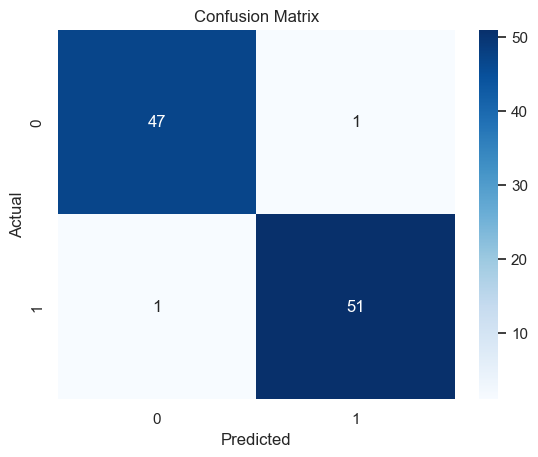

In [60]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()